$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# Meeting 05 - Recursion

Bor-Yuh Evan Chang  
Tuesday, September 10, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- Static Typing -->

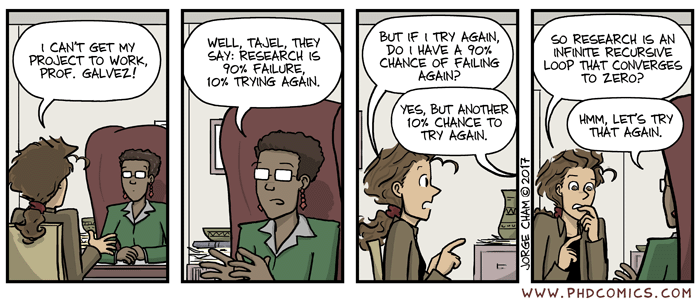

[ In-Class Slides](in-class/meeting05-recursion.pdf)<br/> [ In-Class
Jupyter](in-class/meeting05-recursion.ipynb)<br/> [ Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/recursion.html)

## Announcements

-   HW 1 + Quiz 1 was due ~~Friday 9/6~~ Monday 9/9 6pm
    -   How was it? Do you want to go over parts of it?
-   Lab 1 due this Friday 9/13 6pm
    -   Use GitHub and VS Code: Submit `Lab1.scala`. Just read Jupyter
        notebook or use it for scratch work.

## Announcements

-   A proposal: Lawrence (CM) will come to the classroom (ECCR 265)
    1:45-2 and 3:15-3:30 for his “administrative office hours” so that
    you can more easily get your administrative issues resolved.
-   A proposal: Would you go to evening review sessions run by your CAs?
    Think: an extra, optional recitation to review a planned topic
    (e.g., go over solutions to a past assignment, do extra practice on
    a difficult topic)

## Announcements

-   Bug in assertion for `eval` on `0 / 0` test in `Lab1Spec.scala`.
    -   If you accepted the assignment to create your homework repo
        after 1:30am this morning, you have the updated version.
    -   If you have the old version, the easiest way to update is to
        download the new version from
        <https://github.com/csci3155-f24/pppl-lab1/blob/main/src/test/scala/jsy/lab1/Lab1Spec.scala>.

## Today

-   Triage Your Questions
    -   HW1?
-   Preview Lab 1 (using coding.csel.io)
-   Questions on [Binding and
    Scope](https://csci3155.cs.colorado.edu/pppl-course/book/binding-and-scope.html):
    A Scala crash course.
-   Parts of [Data
    Types](https://csci3155.cs.colorado.edu/pppl-course/book/data-types.html):
    A Scala crash course.
-   [Recursion](https://csci3155.cs.colorado.edu/pppl-course/book/recursion.html):
    A Scala crash course.

## Your Questions?

-   Review:
    -   How do *environments* (type or value) relate to *scope*?
    -   What is `Nil`, `::`, and `foreach`?

## Your Questions?

## Factorial

``` scala
def factorial(n: Int): Int = if (n == 0) 1 else n * factorial(n - 1)
factorial(3)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">factorial</span>
<span class="ansi-cyan-fg">res1_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">6</span></pre>

## Factorial: Some Evaluation Steps

`factorial(3)` $\longrightarrow^\ast$
`if (3 == 0) 1 else 3 * factorial(3 - 1)`

$\longrightarrow^\ast$ `3 * factorial(2)`

$\longrightarrow^\ast$ `3 * 2 * factorial(1)`

$\longrightarrow^\ast$ `3 * 2 * 1 * factorial(0)`

$\longrightarrow^\ast$ `3 * 2 * 1 * 0`

$\longrightarrow^\ast$ `6`

## Factorial: Pattern Matching

``` scala
def factorial(n: Int): Int = n match {
  case 0 => 1
  case _ => n * factorial(n - 1)
}
factorial(3)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">factorial</span>
<span class="ansi-cyan-fg">res3_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">6</span></pre>

## Factorial: Preconditions

``` scala
def factorial(n: Int): Int = {
  require(n >= 0)
  n match {
    case 0 => 1
    case _ => n * factorial(n - 1)
  }
}
factorial(-2)
```

<pre><span class="ansi-red-fg">java.lang.IllegalArgumentException: requirement failed</span>
  scala.Predef$.require(<span class="ansi-green-fg">Predef.scala</span>:<span class="ansi-green-fg">325</span>)
  ammonite.$sess.cmd5$Helper.factorial(<span class="ansi-green-fg">cmd5.sc</span>:<span class="ansi-green-fg">2</span>)
  ammonite.$sess.cmd5$Helper.&lt;init&gt;(<span class="ansi-green-fg">cmd5.sc</span>:<span class="ansi-green-fg">8</span>)
  ammonite.$sess.cmd5$.&lt;clinit&gt;(<span class="ansi-green-fg">cmd5.sc</span>:<span class="ansi-green-fg">7</span>)</pre>

``` scala
def factorial(n: Int): Int = {
  require(n >= 0)
  def f(n: Int): Int = n match {
    case 0 => 1
    case _ => n * f(n - 1)
  }
  f(n)
}
factorial(3)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">factorial</span>
<span class="ansi-cyan-fg">res6_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">6</span></pre>

## Factorial: Tail Recursive

``` scala
def factorial(n: Int): Int = {
  require(n >= 0)
  def loop(acc: Int, n: Int): Int = n match {
    case 0 => acc
    case _ => loop(acc * n, n - 1)
  }
  loop(1, n)
}
factorial(3)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">factorial</span>
<span class="ansi-cyan-fg">res8_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">6</span></pre>

## Tail-Recursive Factorial: Some Evaluation Steps

`factorial(3)` $\longrightarrow^\ast$ `loop(1, 3)`

$\longrightarrow^\ast$ `loop(1 * 3, 2)`

$\longrightarrow^\ast$ `loop(3 * 2, 1)`

$\longrightarrow^\ast$ `loop(6 * 1, 0)`

$\longrightarrow^\ast$ `6`

## Tail-Recursive Factorial

In [11]:
def factorial(n: Int): Int = {
  require(n >= 0)
  println(s"factorial(n = $n)")
  def loop(acc: Int, n: Int): Int = {
    println(s"-->* loop(acc = $acc, n = $n)")
    n match {
      case 0 => acc
      case _ => loop(acc * n, n - 1)
    }
  }
  val r = loop(1, n)
  println(s"-->* $r")
  r
}
factorial(3)

factorial(n = 3)
-->* loop(acc = 1, n = 3)
-->* loop(acc = 3, n = 2)
-->* loop(acc = 6, n = 1)
-->* loop(acc = 6, n = 0)
-->* 6

defined function factorial 
 res9_1 : Int = 6

## Exercise: Exponentiation

``` scala
def exp(x: Int, n: Int): Int = {
  require(n >= 0)
  def f(n: Int): Int = n match {
    case 0 => 1
    case _ => x * f(n - 1)
  }
  f(n)
}
exp(2,4)
assert(exp(2,4) == 16)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">exp</span>
<span class="ansi-cyan-fg">res11_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">16</span></pre>

``` scala
def exp(x: Int, n: Int): Int = {
  require(n >= 0)
  def loop(acc: Int, n: Int): Int = n match {
    case 0 => acc
    case _ => loop(acc * x, n - 1)
  }
  loop(1, n)
}
exp(2,4)
assert(exp(2,4) == 16)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">exp</span>
<span class="ansi-cyan-fg">res12_1</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">16</span></pre>

## Exercise: Tail-Recursive Fibonacci

In [15]:
def fibonacci(n: Int): Long = {
  require(n >= 0)
  n match {
    case 0 | 1 => 1
    case _ => fibonacci(n - 1) + fibonacci(n - 2)
  }
}
fibonacci(6)
//fibonacci(50)

defined function fibonacci 
 res13_1 : Long = 13L

``` scala
def fib(n: Int): Long = {
  require(n >= 0)
  def loop(a: Long, b: Long, m: Int, n: Int): Long =
    if (m == n) b else loop(b, a + b, m + 1, n)
  loop(0L, 1L, 0, n)
}
fib(6)
fib(100)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">fib</span>
<span class="ansi-cyan-fg">res15_1</span>: <span class="ansi-green-fg">Long</span> = <span class="ansi-green-fg">13L</span>
<span class="ansi-cyan-fg">res15_2</span>: <span class="ansi-green-fg">Long</span> = <span class="ansi-green-fg">1298777728820984005L</span></pre>